In [2]:
import numpy as np
import pandas as pd
import json
import os
import re

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.auto import tqdm
import seaborn as sns

# large language package
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

In [3]:
# review_df = pd.read_csv('../NLP Final Project/Yelp Dataset/Reviews.csv')
review_df = pd.read_csv('review_preprocess.csv')
review_df.shape

(568454, 11)

In [9]:
review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This confection around century It light pillow...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great price There wide assortment ...


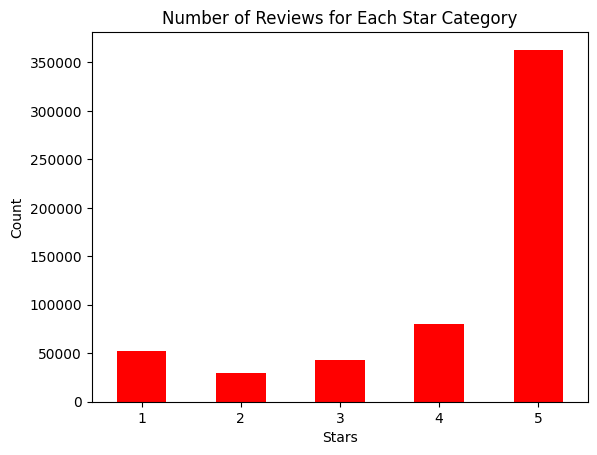

In [6]:
# distribution of review starts
stars_count = review_df['Score'].value_counts().sort_index()

# Plot the graph
stars_count.plot(kind='bar', color='red')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Number of Reviews for Each Star Category')
plt.xticks(rotation=0)
plt.show()

In [4]:
n = 10000
review1 = review_df[review_df['Score'] == 1]['text'].sample(n=n, random_state=11)
review2 = review_df[review_df['Score'] == 2]['text'].sample(n=n, random_state=11)
review3 = review_df[review_df['Score'] == 3]['text'].sample(n=n, random_state=11)
review4 = review_df[review_df['Score'] == 4]['text'].sample(n=n, random_state=11)
review5 = review_df[review_df['Score'] == 5]['text'].sample(n=n, random_state=11)

In [5]:
# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to filter nouns and adjectives from a text
def filter_nouns_and_adjectives(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.pos_ in {'NOUN', 'ADJ'}]
    return ' '.join(filtered_tokens)

# Apply the function to the 'text' column
tqdm.pandas(desc='filter progress')
review1_filtered = review1.progress_apply(filter_nouns_and_adjectives)
review5_filtered = review5.progress_apply(filter_nouns_and_adjectives)

filter progress:   0%|          | 0/10000 [00:00<?, ?it/s]

filter progress:   0%|          | 0/10000 [00:00<?, ?it/s]

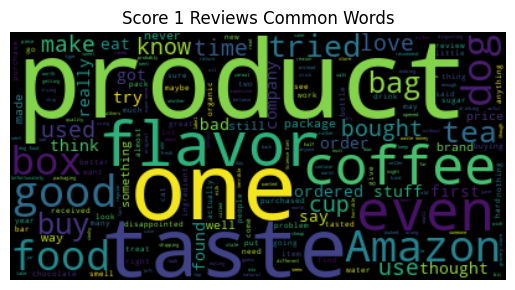

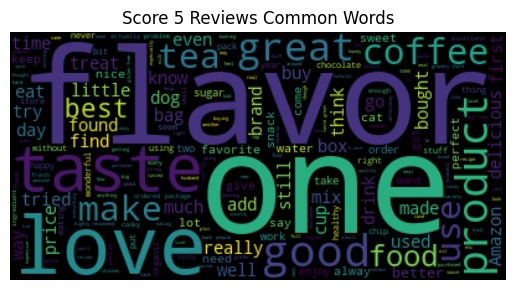

In [7]:
def wordCloudGen(text,title):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# review1 = ' '.join(review1)
wordCloudGen(' '.join(review1),'Score 1 Reviews Common Words')
wordCloudGen(' '.join(review5),'Score 5 Reviews Common Words')

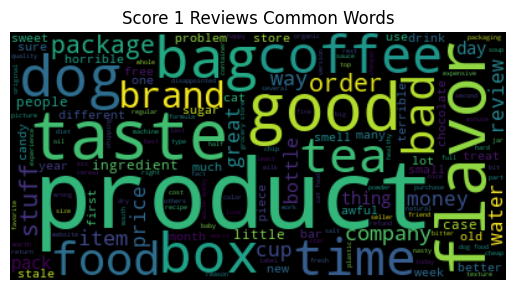

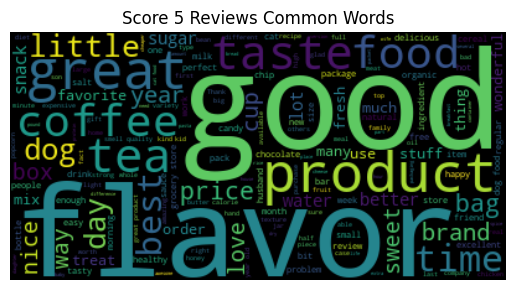

In [8]:
wordCloudGen(' '.join(review1_filtered),'Score 1 Reviews Common Words')
wordCloudGen(' '.join(review5_filtered),'Score 5 Reviews Common Words')

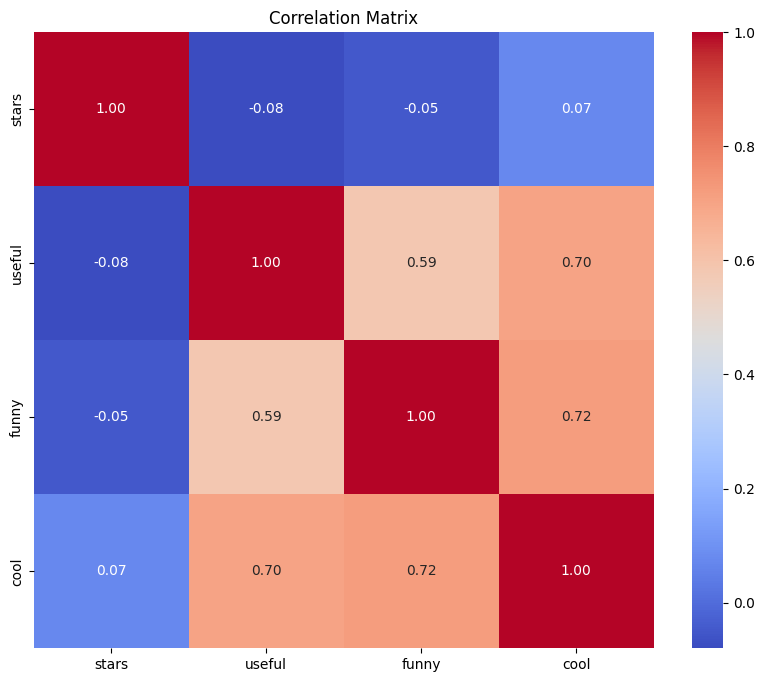

In [10]:
# Compute the correlation matrix
review_df2 = pd.read_csv('review.csv')
correlation_matrix = review_df2[['stars','useful','funny','cool']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
